# <center>EDA - Market Prediction Prediction</center> 

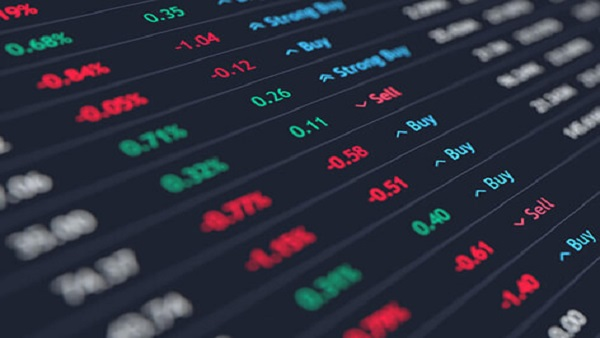

Stock market have always been difficult to predict and even the most brilliant mind of all times had difficulties with the markets

Newton allegedly said that he could “calculate the motions of the heavenly bodies, but not the madness of people.” 1

 
Stock Market prices are not only defined by companies fundamentals. Human behaviour can alter the true value of a company. The valuation of a company can be understood in two well defined kind of analyses the fundamental and the technical. 

For our project we will focus on technical analysis and explore daily data provided by Yahoo about companies and  try to predict the Adj Close.



## <center style="background-color:Gainsboro; width:40%;">Table of Contents</center>

* [Data Set presentation](#data_pres)
* [Data Understanding](#data_understanding)
* [Assessing Data](#assessing)
* [Explore Data](#explore)
* [Feature Engineering](#fe)

In [1]:
# import libraries
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr

import datetime
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
def trace_price(df):
    """
    Trace the price data as an OHCL chart .

    Parameters
    ----------
    df : DataFrame
        daily data containing OHCL data

    Returns
    -------
    fig : go.Figure
        The fugure for the OHCL chart
    """
    
    fig = go.Figure()
    fig.add_trace(go.Ohlc(x=df['Date'],
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close'],name = 'Daily Price' ))
    fig.update_layout(
        title='Daily Price'
    )
    
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(step="all")
            ]),
            font=dict(family='Rockwell',color='black'),
        )
        )
    return fig
    

## <a class="anchor" id="data_pres">Data presentation</a>


We will work with daily trading data. We will use Yahoo Finance's data with pandas_datareader.


> Yahoo Finance provide OHCL, Volume and the Adj Close. 


In [3]:
start_date = "2010-01-01"
end_date = "2021"

df_amazon = pdr.get_data_yahoo("AMZN",start_date,end_date).reset_index()
df_gm = pdr.get_data_yahoo("GM",start_date,end_date).reset_index()
df_bitcoin = pdr.get_data_yahoo("BTC-USD",start_date,end_date).reset_index()

In [4]:
df_amazon.head()

Date        High         Low        Open       Close    Volume  \
0 2010-01-04  136.610001  133.139999  136.250000  133.899994   7599900   
1 2010-01-05  135.479996  131.809998  133.429993  134.690002   8851900   
2 2010-01-06  134.729996  131.649994  134.600006  132.250000   7178800   
3 2010-01-07  132.320007  128.800003  132.009995  130.000000  11030200   
4 2010-01-08  133.679993  129.029999  130.559998  133.520004   9830500   

    Adj Close  
0  133.899994  
1  134.690002  
2  132.250000  
3  130.000000  
4  133.520004

## <a class="anchor" id="data_understanding">Data Understanding</a>


In [5]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2769 non-null   datetime64[ns]
 1   High       2769 non-null   float64       
 2   Low        2769 non-null   float64       
 3   Open       2769 non-null   float64       
 4   Close      2769 non-null   float64       
 5   Volume     2769 non-null   int64         
 6   Adj Close  2769 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.6 KB


In [6]:
df_amazon.describe()

High          Low         Open        Close        Volume  \
count  2769.000000  2769.000000  2769.000000  2769.000000  2.769000e+03   
mean    868.644355   849.222326   859.550181   859.369213  4.565790e+06   
std     826.647410   806.227286   817.316575   816.689516  2.790854e+06   
min     111.290001   105.800003   105.930000   108.610001  8.813000e+05   
25%     246.710007   241.360001   243.179993   243.919998  2.856400e+06   
50%     444.989990   436.390015   440.260010   440.100006  3.895700e+06   
75%    1526.780029  1478.920044  1495.359985  1500.250000  5.385800e+06   
max    3552.250000  3486.689941  3547.000000  3531.449951  4.242110e+07   

         Adj Close  
count  2769.000000  
mean    859.369213  
std     816.689516  
min     108.610001  
25%     243.919998  
50%     440.100006  
75%    1500.250000  
max    3531.449951

## <a class="anchor" id="assessing">Assessing Data</a>


In [7]:
# We don't have missing values
df_amazon.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
#Let's explore the number of traiding days per year
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_amazon.Date.dt.year.unique(), y=df_amazon.groupby(df_amazon.Date.dt.year).count().Date, name = 'Traiding Days',
                             line=dict(color='royalblue', width=2)))

fig.show()

### Market Data are not available for all days in a given year 
The main reasons are
- The markets are open on week days
- The markets are closed for holidays
- For exraordinary ocasions the markets can be closed

In general we can assume to have 252 trading day in a year

### Correlation

In [9]:
df_amazon.corr()

High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.999790  0.999878  0.999857 -0.022784   0.999857
Low        0.999790  1.000000  0.999835  0.999867 -0.031467   0.999867
Open       0.999878  0.999835  1.000000  0.999715 -0.026455   0.999715
Close      0.999857  0.999867  0.999715  1.000000 -0.027234   1.000000
Volume    -0.022784 -0.031467 -0.026455 -0.027234  1.000000  -0.027234
Adj Close  0.999857  0.999867  0.999715  1.000000 -0.027234   1.000000

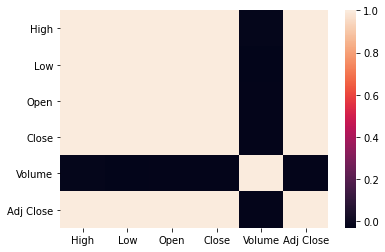

In [10]:
sns.heatmap(df_amazon.corr());

<AxesSubplot:>

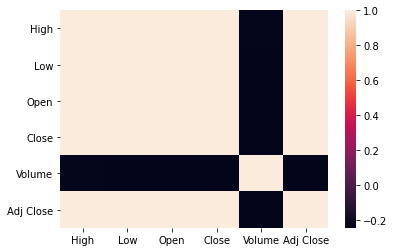

In [11]:
sns.heatmap(df_amazon.groupby(df_amazon.Date.dt.isocalendar().week).mean().corr())

<AxesSubplot:>

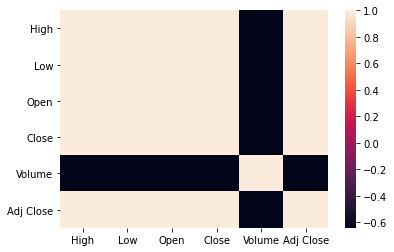

In [12]:
sns.heatmap(df_amazon.groupby(df_amazon.Date.dt.month).mean().corr())

<AxesSubplot:>

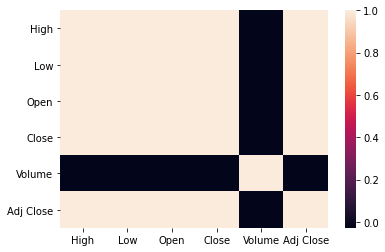

In [13]:
sns.heatmap(df_amazon.groupby(df_amazon.Date.dt.year).mean().corr())

## <a class="anchor" id="explore">Explore Data</a>


In [14]:
trace_price(df_amazon).show()

In [15]:
#Let's explore the Adj Close
fig = go.Figure()
fig.update_layout(
        title='Adj Close')

fig.add_trace(go.Scatter(x=df_amazon.Date, y=df_amazon["Adj Close"], name = 'Adj Close',
                             line=dict(color='royalblue', width=2)))
fig.show()

In [16]:
#Let's explore the volume
fig = go.Figure()
fig.update_layout(
        title='Volume')

fig.add_trace(go.Scatter(x=df_amazon.Date, y=df_amazon.Volume, name = 'Volume',
                             line=dict(color='royalblue', width=2)))
fig.show()

## <a class="anchor" id="fe">Feature Engineering</a>

We will need some technical indicators to be able to predict the adjusted price.

A well konwn indicator is the Relative Strength Index (RSI). 

In [17]:
def generate_returns(prices):
    """
    Generate returns for ticker and date.

    Parameters
    ----------
    prices : DataFrame
        Price for each ticker and date

    Returns
    -------
    returns : Dataframe
        The returns for each ticker and date
    """
    return np.log1p(prices.pct_change())

In [18]:
def generate_volatility(returns):
    """
    Generate volatility for ticker and date.

    Parameters
    ----------
    prices : DataFrame
        Returns for each ticker and date

    Returns
    -------
    returns : Dataframe
        The volatility for each ticker and date
    """
    return returns.rolling(window=252).std() * np.sqrt(252)

In [19]:
returns = generate_returns(df_amazon["Adj Close"])

In [20]:
fig = go.Figure()
fig.update_layout(
        title='Log_returns')

fig.add_trace(go.Scatter(x=df_amazon.Date, y=returns, name = 'Returns',
                             line=dict(color='royalblue', width=2)))
fig.show()

In [21]:
#https://tcoil.info/compute-rsi-for-stocks-with-python-relative-strength-index/
def RSI (data, time_window):
    diff = data.diff(1).dropna()        
    # diff in one field(one day)
    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi



In [22]:
rsi_5 = RSI(df_amazon["Adj Close"],5)
rsi_14 = RSI(df_amazon["Adj Close"],14)
rsi_28 = RSI(df_amazon["Adj Close"],28)

In [23]:
#Let's explore the volume
fig = go.Figure()
fig.update_layout(
        title='RSI 14')

fig.add_trace(go.Scatter(x=df_amazon.Date, y=rsi_5, name = 'RSI 5',
                             line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=df_amazon.Date, y=rsi_14, name = 'RSI 14',
                             line=dict(color='royalblue', width=2)))
fig.add_trace(go.Scatter(x=df_amazon.Date, y=rsi_28, name = 'RSI 28',
                             line=dict(color='green', width=2)))
fig.show()

## Volatility

In [24]:
#Industrial compagny - GM
volatility_gm = generate_volatility(generate_returns(df_gm["Adj Close"]))

#Technology- Amazon
volatility_amazon = generate_volatility(generate_returns(df_amazon["Adj Close"]))

#Bitcoin
volatility_bitcoin = generate_volatility(generate_returns(df_bitcoin["Adj Close"]))


fig = go.Figure()
fig.update_layout(
        title='Volatility per Sector')

fig.add_trace(go.Scatter(x=df_gm.Date, y=volatility_gm, name = 'GM',
                             line=dict(color='royalblue', width=2)))

fig.add_trace(go.Scatter(x=df_amazon.Date, y=volatility_amazon, name = 'Amazon',
                             line=dict(color='green', width=2)))

fig.add_trace(go.Scatter(x=df_bitcoin.Date, y=volatility_bitcoin, name = 'Bitcoin',
                             line=dict(color='orange', width=2)))
fig.show()